In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set_theme(style="whitegrid")

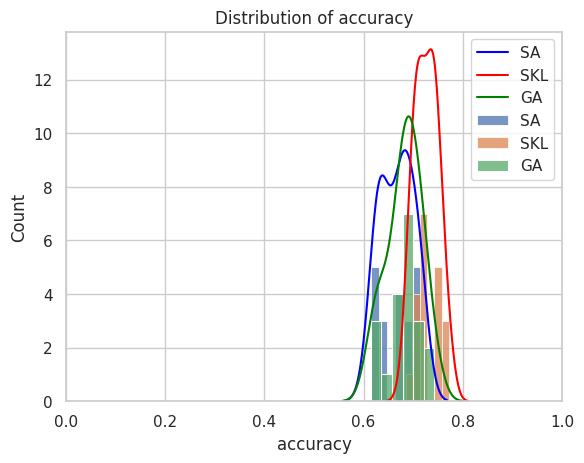

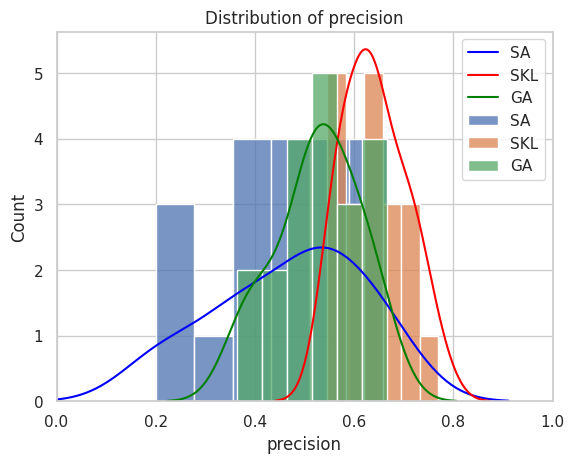

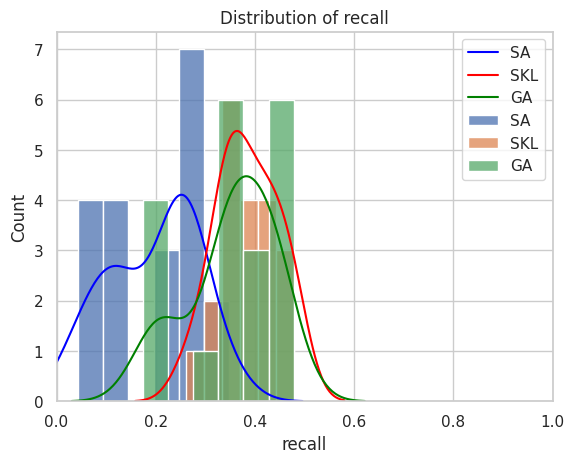

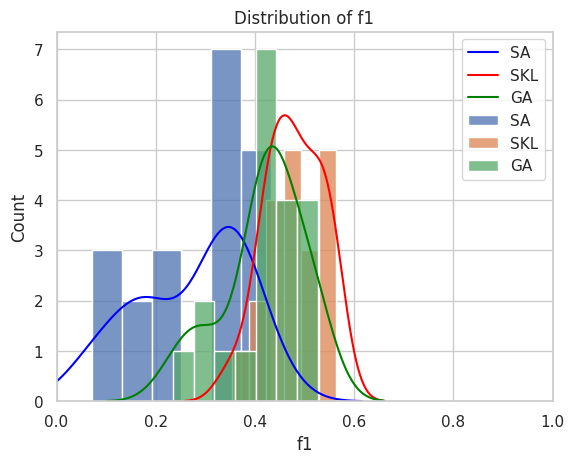

In [57]:
sa_performance_path = "data/SA_performance.csv"
skl_performance_path = "data/SKL_performance.csv"
ga_performance_path = "data/GA_performance.csv"

all_paths = [sa_performance_path, skl_performance_path, ga_performance_path]

accuracies = {}
precisions = {}
recalls = {}
f1s = {}

metrics = {
    "accuracy": accuracies,
    "precision": precisions,
    "recall": recalls,
    "f1": f1s

}

model_name_to_kde_color = {
    "SA": "blue",
    "SKL": "red",
    "GA": "green"
}

for path in all_paths:
    df = pd.read_csv(path, index_col=0)
    df = df.iloc[:-1, :-1]
    model_name = path.split("_")[0].split("/")[-1]
    
    accuracies[model_name] = df["accuracy"]
    precisions[model_name] = df["precision"]
    recalls[model_name] = df["recall"]
    f1s[model_name] = df["f1"]
    
for name, metric in metrics.items():
    fig, ax = plt.subplots()
    ax.set_title("Distribution of " + name)
    ax.set_xlim(0, 1)
    for model_name in metric.keys():
        sns.histplot(metric[model_name], label=model_name)
        sns.kdeplot(metric[model_name], label=model_name, ax=ax, color=model_name_to_kde_color[model_name])
        
    plt.legend()
    plt.savefig("output/" + name + "_distribution.png")
    plt.show()
    
    
    
    
    # drop the last row
    

In [32]:
performance_path = "data/SA_performance.csv"
# performance_path = "data/SKL_performance.csv"
# performance_path = "data/GA_performance.csv"

model_name = performance_path.split("/")[-1].split("_")[0]
performance = pd.read_csv(performance_path, index_col=0)

normalized_performance = performance[["accuracy", "f1", "precision", "recall"]]
normalized_performance.head()

# remove last row (average)
normalized_performance = normalized_performance.iloc[:-1]


In [ ]:
# plot each column as a histogram, with x-axis from 0-1
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(normalized_performance.columns):
    # Set x-axis limits
    ax[i//2, i%2].set_xlim(0, 1)
    
    # Plot histogram
    sns.histplot(normalized_performance[col], ax=ax[i//2, i%2])
    sns.kdeplot(normalized_performance[col], ax=ax[i//2, i%2], color="r", clip=(0, 1))
    
    ax[i//2, i%2].set_title(col)
    
plt.tight_layout()
plt.savefig(f"output/{model_name}_performance_histograms.png")
plt.show()


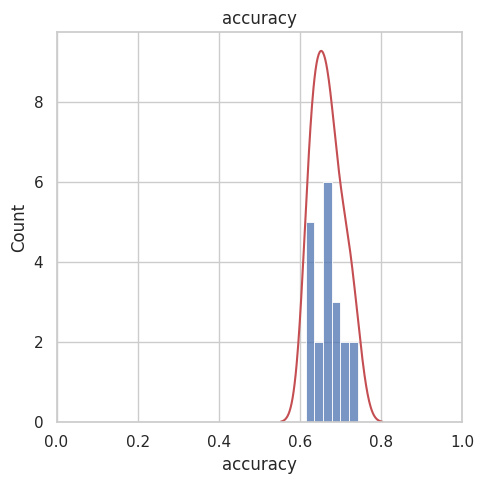

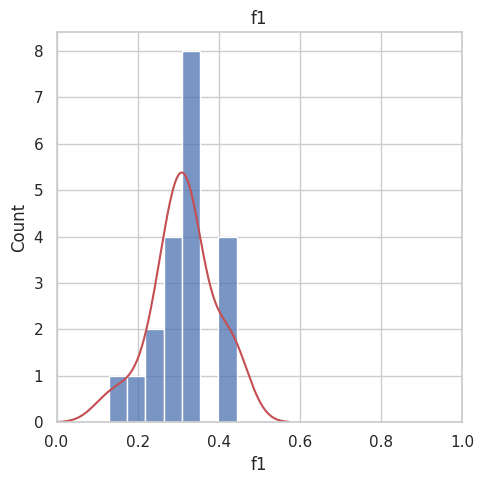

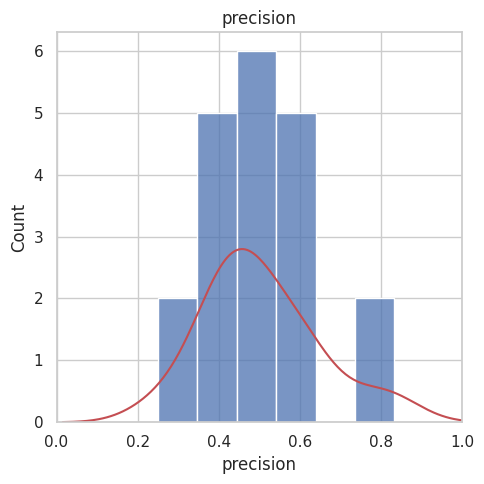

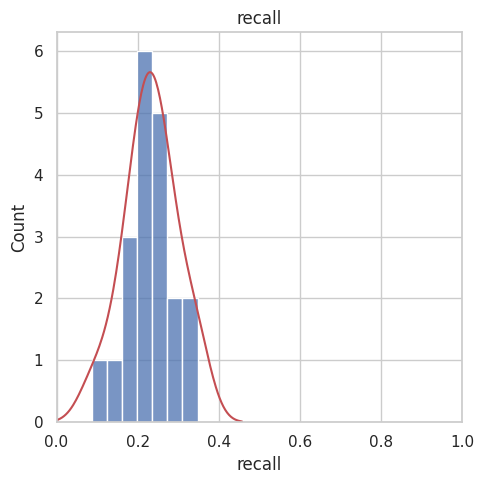

In [33]:
# plot each column as a histogram, with x-axis from 0-1, as separate plots
for i, col in enumerate(normalized_performance.columns):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # Set x-axis limits
    ax.set_xlim(0, 1)
    
    # Plot histogram
    sns.histplot(normalized_performance[col], ax=ax)
    sns.kdeplot(normalized_performance[col], ax=ax, color="r", clip=(0, 1))
    
    ax.set_title(col)
    
    plt.tight_layout()
    plt.savefig(f"output/{model_name}_{col}_histogram.png")
    plt.show()